In [130]:
import numpy as np
import pandas as pd
from tensorflow import keras
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from statistics import mode 
import datetime

from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import GaussianNoise
from matplotlib import pyplot
from keras.initializers import RandomNormal

from tensorflow.keras import layers
from tensorflow.keras import activations

from PIL import Image

In [131]:
try:
  %tensorflow_version 2.x
  %load_ext tensorboard
except:
  pass

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [132]:
os.getcwd()
os.chdir(r'/content/drive/MyDrive/ANN_fall99/HW6/FCGAN/')

# models building blocks 

#### Base model:

In [133]:
def define_discriminator(in_shape=(28,28,1)):
  discriminator = Sequential()
  init = RandomNormal(mean=0.0,stddev=0.02)
  discriminator.add(Flatten(input_shape=in_shape))

  discriminator.add(Dense(1024,kernel_initializer=init))
  discriminator.add(LeakyReLU(0.2))

  discriminator.add(Dense(512,kernel_initializer=init))
  discriminator.add(LeakyReLU(0.2))

  discriminator.add(Dense(256,kernel_initializer=init))
  discriminator.add(LeakyReLU(0.2))

  discriminator.add(Dense(1, activation='sigmoid',kernel_initializer=init))
  opt = Adam(lr=0.0002, beta_1=0.5)
  discriminator.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return discriminator
 
def define_generator(latent_dim):
  generator = Sequential()
  init = RandomNormal(mean=0.0, stddev=0.02)

  generator.add(Dense(256, input_dim=latent_dim,kernel_initializer=init))
  generator.add(LeakyReLU(0.2))

  generator.add(Dense(512,kernel_initializer=init))
  generator.add(LeakyReLU(0.2))

  generator.add(Dense(1024,kernel_initializer=init))
  generator.add(LeakyReLU(0.2))

  generator.add(Dense(28*28, activation='tanh',kernel_initializer=init))
  generator.add(Reshape((28, 28, 1)))
  return generator

def define_gan(g_model, d_model):
	d_model.trainable = False
	model = Sequential()
	model.add(g_model)
	model.add(d_model)
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

### batch-normalization:

In [79]:
def define_generator(latent_dim):
  generator = Sequential()
  init = RandomNormal(mean=0.0, stddev=0.02)

  generator.add(Dense(256, input_dim=latent_dim,kernel_initializer=init))
  generator.add(BatchNormalization())
  generator.add(LeakyReLU(0.2))

  generator.add(Dense(512,kernel_initializer=init))
  generator.add(BatchNormalization())
  generator.add(LeakyReLU(0.2))

  generator.add(Dense(1024,kernel_initializer=init))
  generator.add(BatchNormalization())
  generator.add(LeakyReLU(0.2))

  generator.add(Dense(28*28, activation='tanh',kernel_initializer=init))
  generator.add(Reshape((28, 28, 1)))
  return generator

### Dropout:

In [110]:
def define_generator(latent_dim):
  generator = Sequential()
  init = RandomNormal(mean=0.0, stddev=0.02)

  generator.add(Dense(256, input_dim=latent_dim,kernel_initializer=init))
  generator.add(LeakyReLU(0.2))
  generator.add(Dropout(0.2))

  generator.add(Dense(512,kernel_initializer=init))
  generator.add(LeakyReLU(0.2))
  generator.add(Dropout(0.2))

  generator.add(Dense(1024,kernel_initializer=init))
  generator.add(LeakyReLU(0.2))
  generator.add(Dropout(0.2))

  generator.add(Dense(28*28, activation='tanh',kernel_initializer=init))
  generator.add(Reshape((28, 28, 1)))
  return generator

### Dropout + batchnorm:

In [122]:
def define_generator(latent_dim):
  generator = Sequential()
  init = RandomNormal(mean=0.0, stddev=0.02)

  generator.add(Dense(256, input_dim=latent_dim,kernel_initializer=init))
  generator.add(BatchNormalization())
  generator.add(LeakyReLU(0.2))
  generator.add(Dropout(0.2))

  generator.add(Dense(512,kernel_initializer=init))
  generator.add(BatchNormalization())
  generator.add(LeakyReLU(0.2))
  generator.add(Dropout(0.2))

  generator.add(Dense(1024,kernel_initializer=init))
  generator.add(BatchNormalization())
  generator.add(LeakyReLU(0.2))
  generator.add(Dropout(0.2))

  generator.add(Dense(28*28, activation='tanh',kernel_initializer=init))
  generator.add(Reshape((28, 28, 1)))
  return generator

### Dense:

In [134]:
def define_generator(latent_dim):
  generator = Sequential()
  init = RandomNormal(mean=0.0, stddev=0.02)

  generator.add(Dense(128, input_dim=latent_dim,kernel_initializer=init))
  generator.add(LeakyReLU(0.2))

  generator.add(Dense(256,kernel_initializer=init))
  generator.add(LeakyReLU(0.2))

  generator.add(Dense(512,kernel_initializer=init))
  generator.add(LeakyReLU(0.2))

  generator.add(Dense(1024,kernel_initializer=init))
  generator.add(LeakyReLU(0.2))

  generator.add(Dense(28*28, activation='tanh',kernel_initializer=init))
  generator.add(Reshape((28, 28, 1)))
  return generator

### Noise:


In [116]:
def define_discriminator(in_shape=(28,28,1)):
  discriminator = Sequential()
  discriminator.add(GaussianNoise(0.5,input_shape=in_shape))
  init = RandomNormal(mean=0.0,stddev=0.02)
  discriminator.add(Flatten())

  discriminator.add(Dense(1024,kernel_initializer=init))
  discriminator.add(LeakyReLU(0.2))

  discriminator.add(Dense(512,kernel_initializer=init))
  discriminator.add(LeakyReLU(0.2))

  discriminator.add(Dense(256,kernel_initializer=init))
  discriminator.add(LeakyReLU(0.2))

  discriminator.add(Dense(1, activation='sigmoid',kernel_initializer=init))
  opt = Adam(lr=0.0002, beta_1=0.5)
  discriminator.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return discriminator

# setting datasets:

In [135]:
from numpy import ones
from numpy.random import random
 
def smooth_positive_labels(y):
	return y - (random(y.shape) * 0.2)

In [136]:
def load_real_samples():
	(trainX, _), (_, _) = load_data()
	X = expand_dims(trainX, axis=-1)
	X = X.astype('float32')
	X = (X-127.5) / 127.5
	return X
 
def generate_real_samples(dataset, n_samples):
	ix = randint(0, dataset.shape[0], n_samples)
	X = dataset[ix]
	y = ones((n_samples, 1))
	return X, y
 
def generate_latent_points(latent_dim, n_samples):
	x_input = randn(latent_dim * n_samples)
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input
 
def generate_fake_samples(g_model, latent_dim, n_samples):
	x_input = generate_latent_points(latent_dim, n_samples)
	X = g_model.predict(x_input)
	y = zeros((n_samples, 1))
	return X, y

# summarizing:

In [137]:
def save_plot(examples, epoch, n=5):
  for i in range(n * n):
    pyplot.subplot(n, n, 1 + i)
    pyplot.axis('off')
    pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
  # pyplot.suptitle('after {} epochs'.format(epoch+1),size = 20)
  filename = 'Plots/noise/generated_plot_e%03d_' % (epoch+1) + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '.png'
  pyplot.savefig(filename)
  plt = Image.open(filename)
  pyplot.close()
  return plt
 
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
  X_real, y_real = generate_real_samples(dataset, n_samples)
  y_real = np.ones(y_real.shape)
  _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
  x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
  _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
  print('>Discriminator accuracy on real_data: %.0f%%, fake_data: %.0f%%' % (acc_real*100, acc_fake*100))
  plts = save_plot(x_fake, epoch)
  filename = 'Models/noise/generator_model_%03d_' % (epoch + 1) + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '.h5'
  g_model.save(filename)
  return(acc_real, plts)

# Training models:


In [139]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=50, n_batch=256):
  accuracies, plots = [], []
  bat_per_epo = int(dataset.shape[0] / n_batch)
  half_batch = int(n_batch / 2)
  for i in range(n_epochs):
    for j in range(bat_per_epo):
      X_real, y_real = generate_real_samples(dataset, half_batch)
      X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
      X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
      d_loss, _ = d_model.train_on_batch(X, y)
      X_gan = generate_latent_points(latent_dim, n_batch)
      y_gan = ones((n_batch, 1))
      g_loss = gan_model.train_on_batch(X_gan, y_gan)

    if (i+1) % 5 == 0:
      print('>%d, %d/%d, d_loss=%.3f, g_loss=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
      output = summarize_performance(i, g_model, d_model, dataset, latent_dim)
      accuracies.append(output[0])
      plots.append(output[1])
  return accuracies,plots
      

# running and training:

In [140]:
plt.style.use(['default'])
latent_dim = 100
d_model = define_discriminator()
g_model = define_generator(latent_dim)
gan_model = define_gan(g_model, d_model)
dataset = load_real_samples()
real_accs, all_plots = train(g_model, d_model, gan_model, dataset, latent_dim)

>5, 234/234, d_loss=0.058, g_loss=5.612
>Discriminator accuracy on real_data: 96%, fake_data: 100%


KeyboardInterrupt: ignored

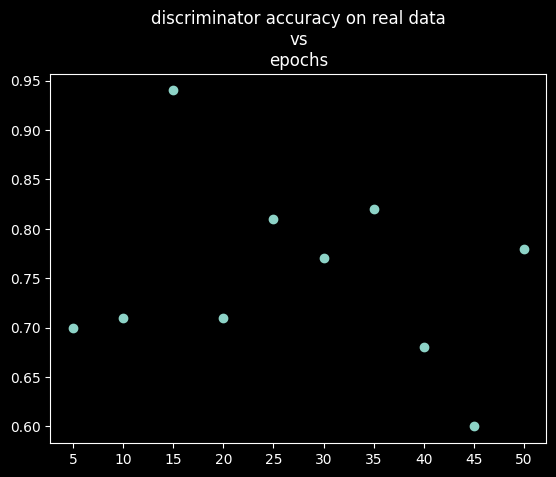

In [122]:
plt.style.use(['dark_background'])
plt.rcParams['figure.figsize'] = (6.4,4.8)
plt.scatter((np.arange(len(real_accs))+1)*5,real_accs)
plt.xticks((np.arange(len(real_accs))+1)*5)
plt.title('discriminator accuracy on real data\nvs\nepochs')
plt.show()

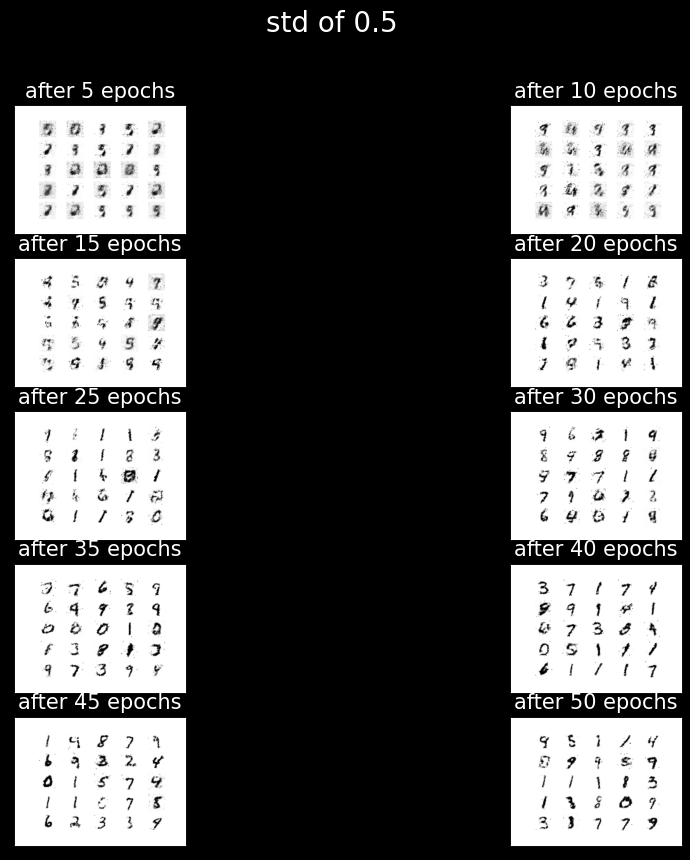

In [123]:
plt.rcParams['figure.figsize'] = (2*6.4,2*4.8)
for i in range(len(all_plots)):
  ax = plt.subplot(5,2,i+1)
  plt.imshow(all_plots[i])
  plt.title('after {} epochs'.format((i+1)*5),size = 15)
  # plt.axis('off')
  plt.xticks([])
  plt.yticks([])
  ax.set_aspect('equal')
plt.suptitle('std of 0.5',size = 20)
plt.subplots_adjust(wspace = 0)

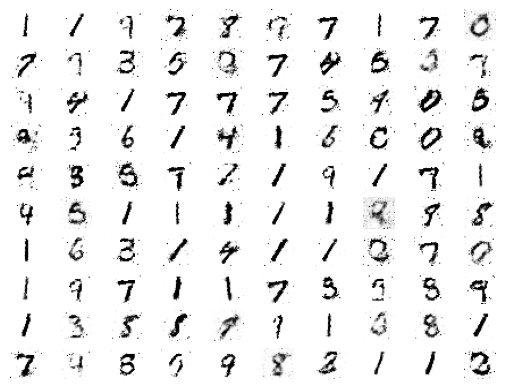

In [145]:
  best_model = tf.keras.models.load_model('Models/Dense/generator_model_045_20210212-200943.h5')
  x,y = generate_fake_samples(best_model,100,100)
  n = 10
  for i in range(n*n):
    pyplot.subplot(n, n, 1 + i)
    pyplot.axis('off')
    pyplot.imshow(x[i, :, :, 0], cmap='gray_r')